In [1]:
# Importing all neccesary dependant

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns


# **Variables:**

***Medical(current):***



  *   totChol: total cholesterol level (Continuous)
  *   sysBP: systolic blood pressure (Continuous)
  * diaBP: diastolic blood pressure (Continuous)
  *   diaBP: diastolic blood pressure (Continuous)
  *  BMI: Body Mass Index (Continuous)
  *  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
  *   glucose: glucose level (Continuous)






***Predict variable (desired target):**

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Data Source www.kaggle.com

In [7]:
## How load my data set
df_fhd = pd.read_csv('/content/framingham.csv')

In [8]:
# How Dataframe look like

df_fhd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
# Dimensions

df_fhd.shape

(4240, 16)

In [10]:
#Let us check datset's attribute info

df_fhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
# Basic description

#pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_fhd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


# **Fittering Dataset**

In [15]:
df_fhd.isnull().sum()/len(df_fhd)*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64


**How to visualize the relative missing value in a column**




In [16]:
import missingno as msno

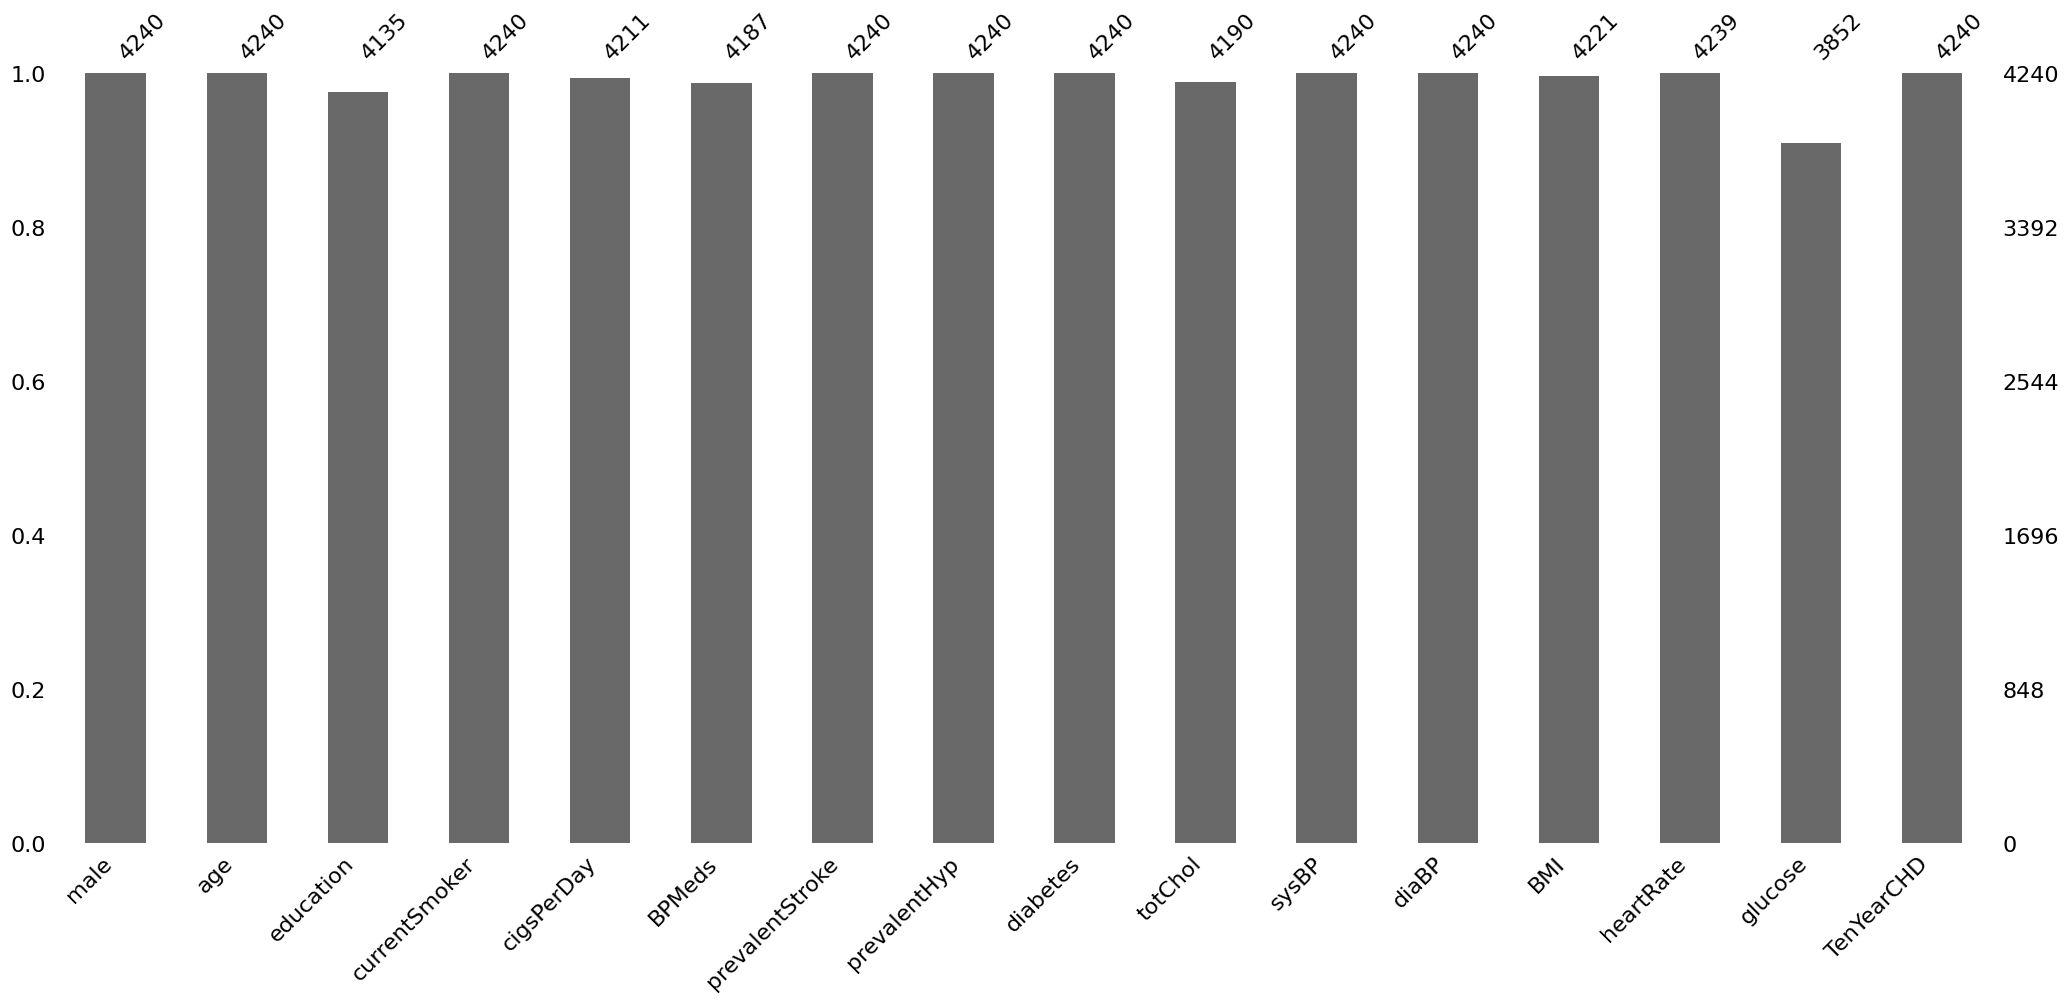

In [17]:
msno.bar(df_fhd)
plt.show()

# **Dealing with missing values**

**Let fill all the missing value with mean value respectively**

In [ ]:
##how to replace missing value
df_fhd['glucose']=df_fhd['glucose'].fillna(df_fhd['glucose'].mean())
df_fhd['education']=df_fhd['education'].fillna(df_fhd['education'].mean())
df_fhd['BPMeds']=df_fhd['BPMeds'].fillna(df_fhd['BPMeds'].mean())
df_fhd['totChol']=df_fhd['totChol'].fillna(df_fhd['totChol'].mean())
df_fhd['cigsPerDay']=df_fhd['cigsPerDay'].fillna(df_fhd['cigsPerDay'].mean())

In [ ]:
(df_fhd.isnull().sum())*100/len(df_fhd)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [ ]:
df_fhd['BMI']=df_fhd['BMI'].fillna(df_fhd['BMI'].mean())
df_fhd['heartRate']=df_fhd['heartRate'].fillna(df_fhd['heartRate'].mean())

In [ ]:
## Drop row with >10% missingness
##df_fhd = df_fhd.dropna()

In [ ]:
df_fhd.isnull().sum()*100/len(df_fhd)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

# **Checking for duplicates**

In [ ]:
# How to check for row duplicates
df_fhd.duplicated().sum()

0

# **Renaming column**

In [ ]:
# renaming TenYearCHD to CHD
df_fhd.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

# **Data Transformation**

In [13]:
df_fhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [14]:
df_fhd['diabetes'].unique()

array([0, 1])

In [ ]:
df_fhd['diabetes'].value_counts(normalize=True)

0    0.974292
1    0.025708
Name: diabetes, dtype: float64

In [ ]:
df_fhd['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

In [ ]:
df_fhd['BMI']=df_fhd['BMI'].value_counts()

# **Exploratory Analysis**

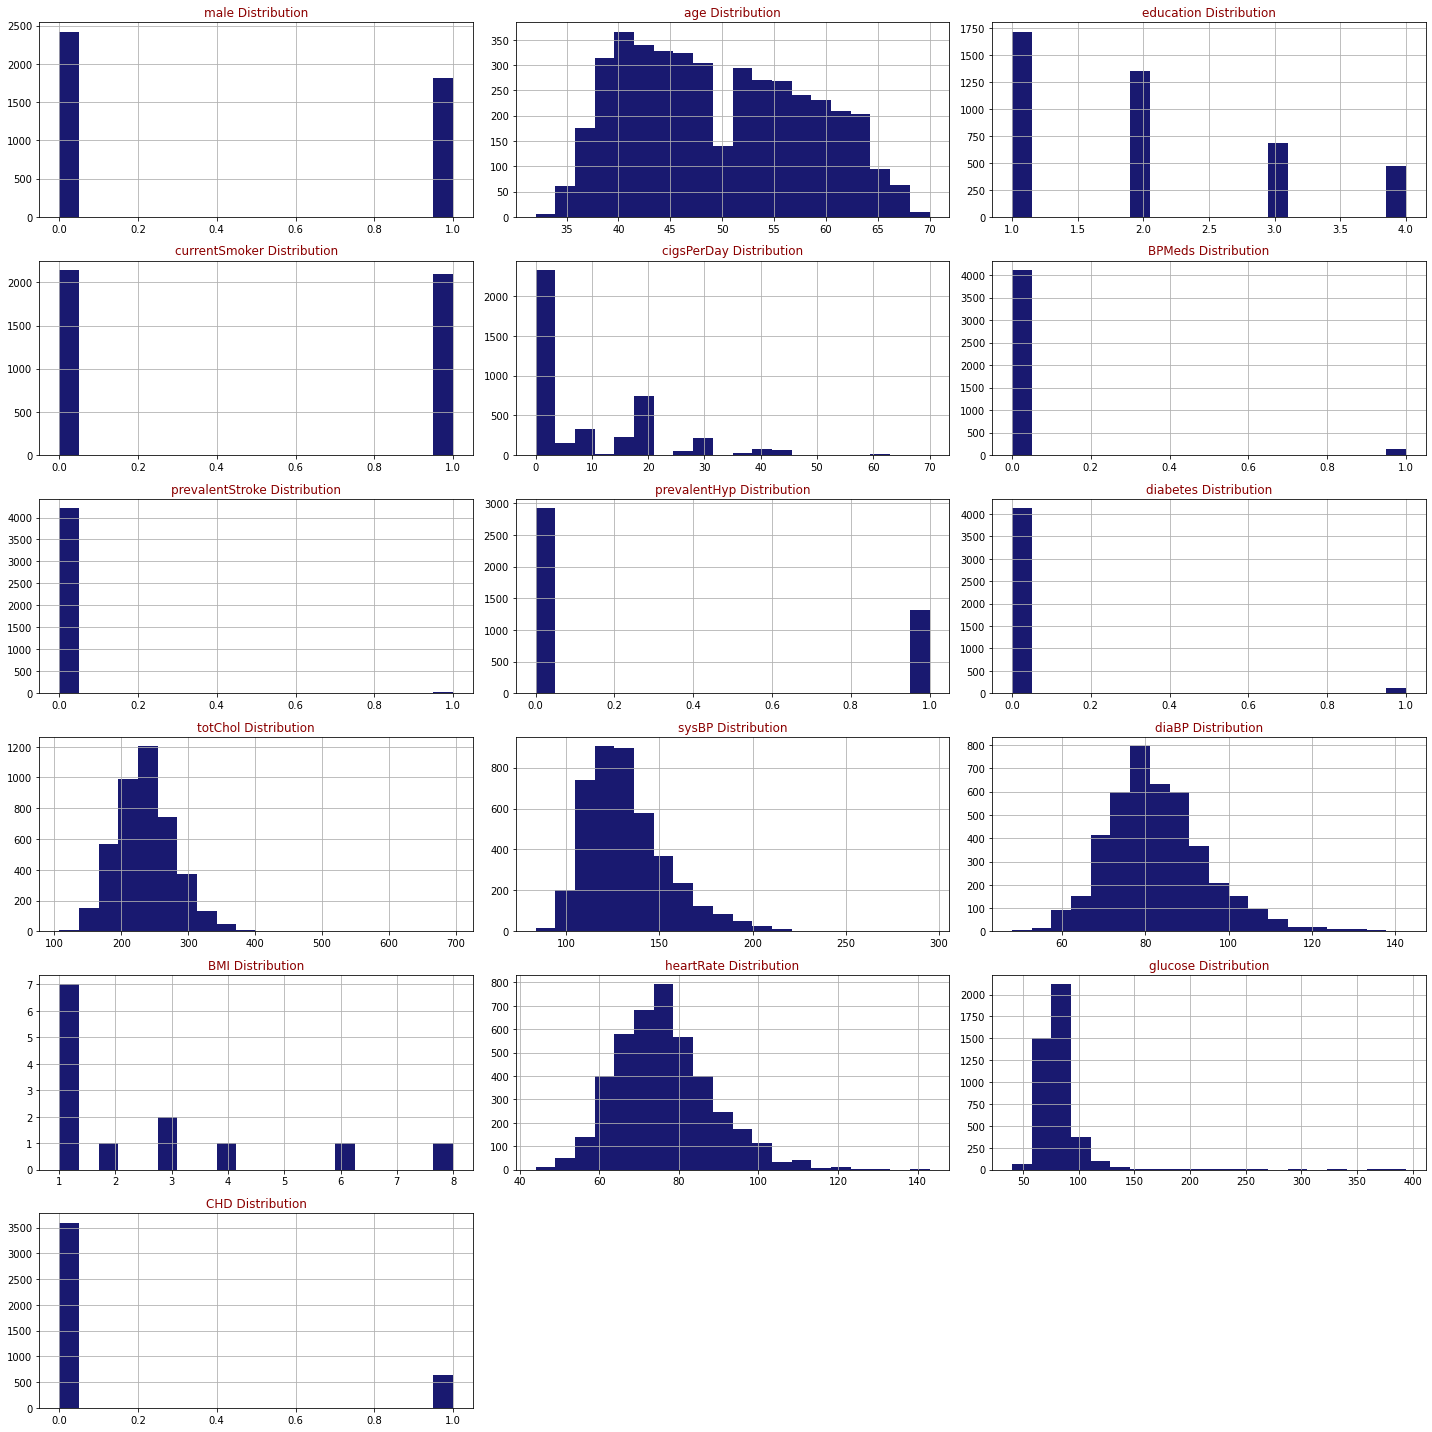

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(df_fhd,df_fhd.columns,6,3)

<function matplotlib.pyplot.show(close=None, block=None)>

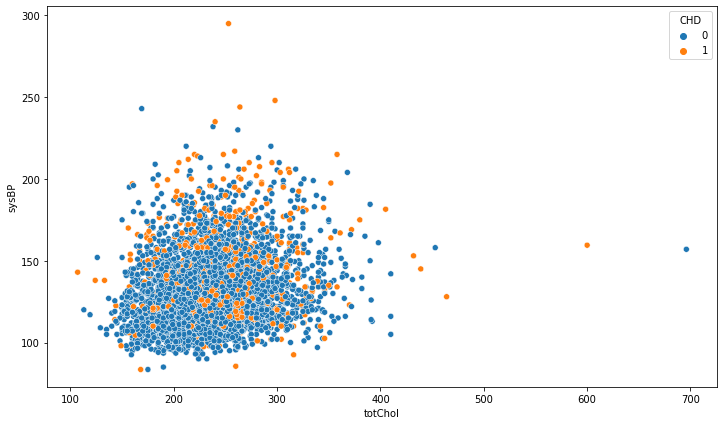

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_fhd,y='sysBP', x='totChol', hue='CHD')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

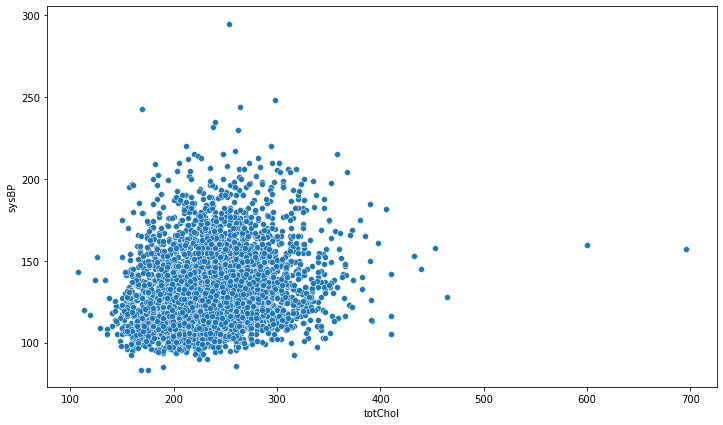

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_fhd,y='sysBP', x='totChol')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

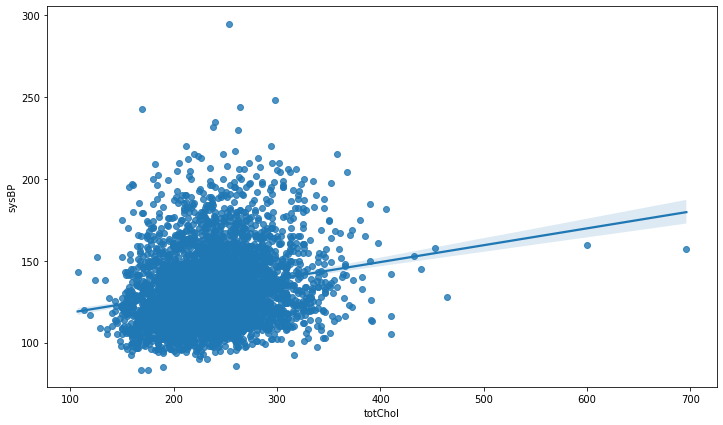

In [ ]:
plt.figure(figsize=(12, 7))
sns.regplot(data=df_fhd,y='sysBP', x='totChol')
plt.show

In [ ]:
df_fhd.CHD.value_counts()

0    3596
1     644
Name: CHD, dtype: int64

Text(0.5, 1.0, 'Target Class Count')

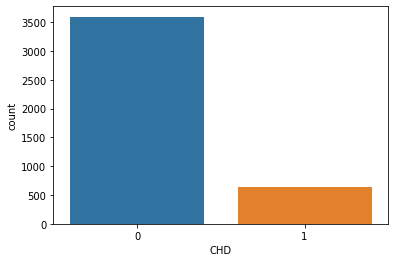

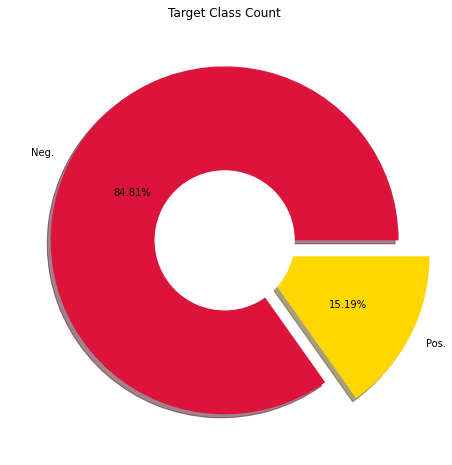

In [ ]:
sns.countplot(x='CHD',data=df_fhd)

#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df_fhd['CHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')


Observations :

We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.

We'll need to Over-sample the Dataset in this case to get the best out of it.

But before we proceed with Over-Sampling we'll First try Basic Logistic Regression Model on Data we had processed.

***There are 3596 patents with no heart disease and 644 patients with risk of heart disease.***

In [ ]:
df_fhd.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
male,1.000000,-0.029014,0.017188,0.197026,0.316023,-0.052203,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081705,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.164081,-0.213662,-0.192534,0.122036,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135578,-0.012839,0.116951,0.225408
education,0.017188,-0.164081,1.000000,0.018297,0.008197,-0.010689,-0.035139,-0.080753,-0.038214,-0.022993,-0.128126,-0.061362,-0.135876,-0.053603,-0.033837,-0.053571
currentSmoker,0.197026,-0.213662,0.018297,1.000000,0.767055,-0.048621,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167483,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.008197,0.767055,1.000000,-0.045847,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092888,0.075257,-0.056020,0.057646
BPMeds,-0.052203,0.122036,-0.010689,-0.048621,-0.045847,1.000000,0.115008,0.259125,0.051584,0.078973,0.252023,0.192387,0.099586,0.015172,0.048925,0.086805
prevalentStroke,-0.004550,0.057679,-0.035139,-0.032980,-0.032711,0.115008,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024856,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.080753,-0.103710,-0.066444,0.259125,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300599,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.038214,-0.044285,-0.037086,0.051584,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086282,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.022993,-0.046211,-0.026182,0.078973,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115013,0.090678,0.044710,0.081807


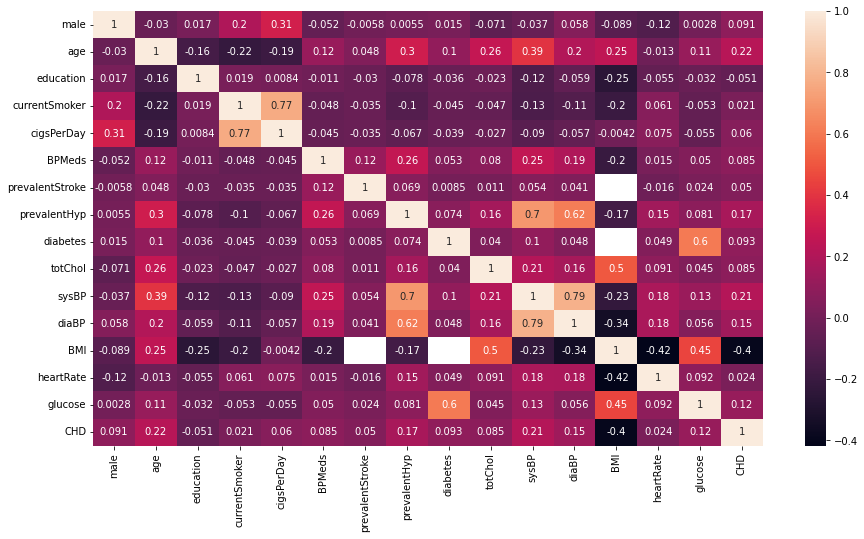

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_fhd.corr(), annot = True)
plt.show()

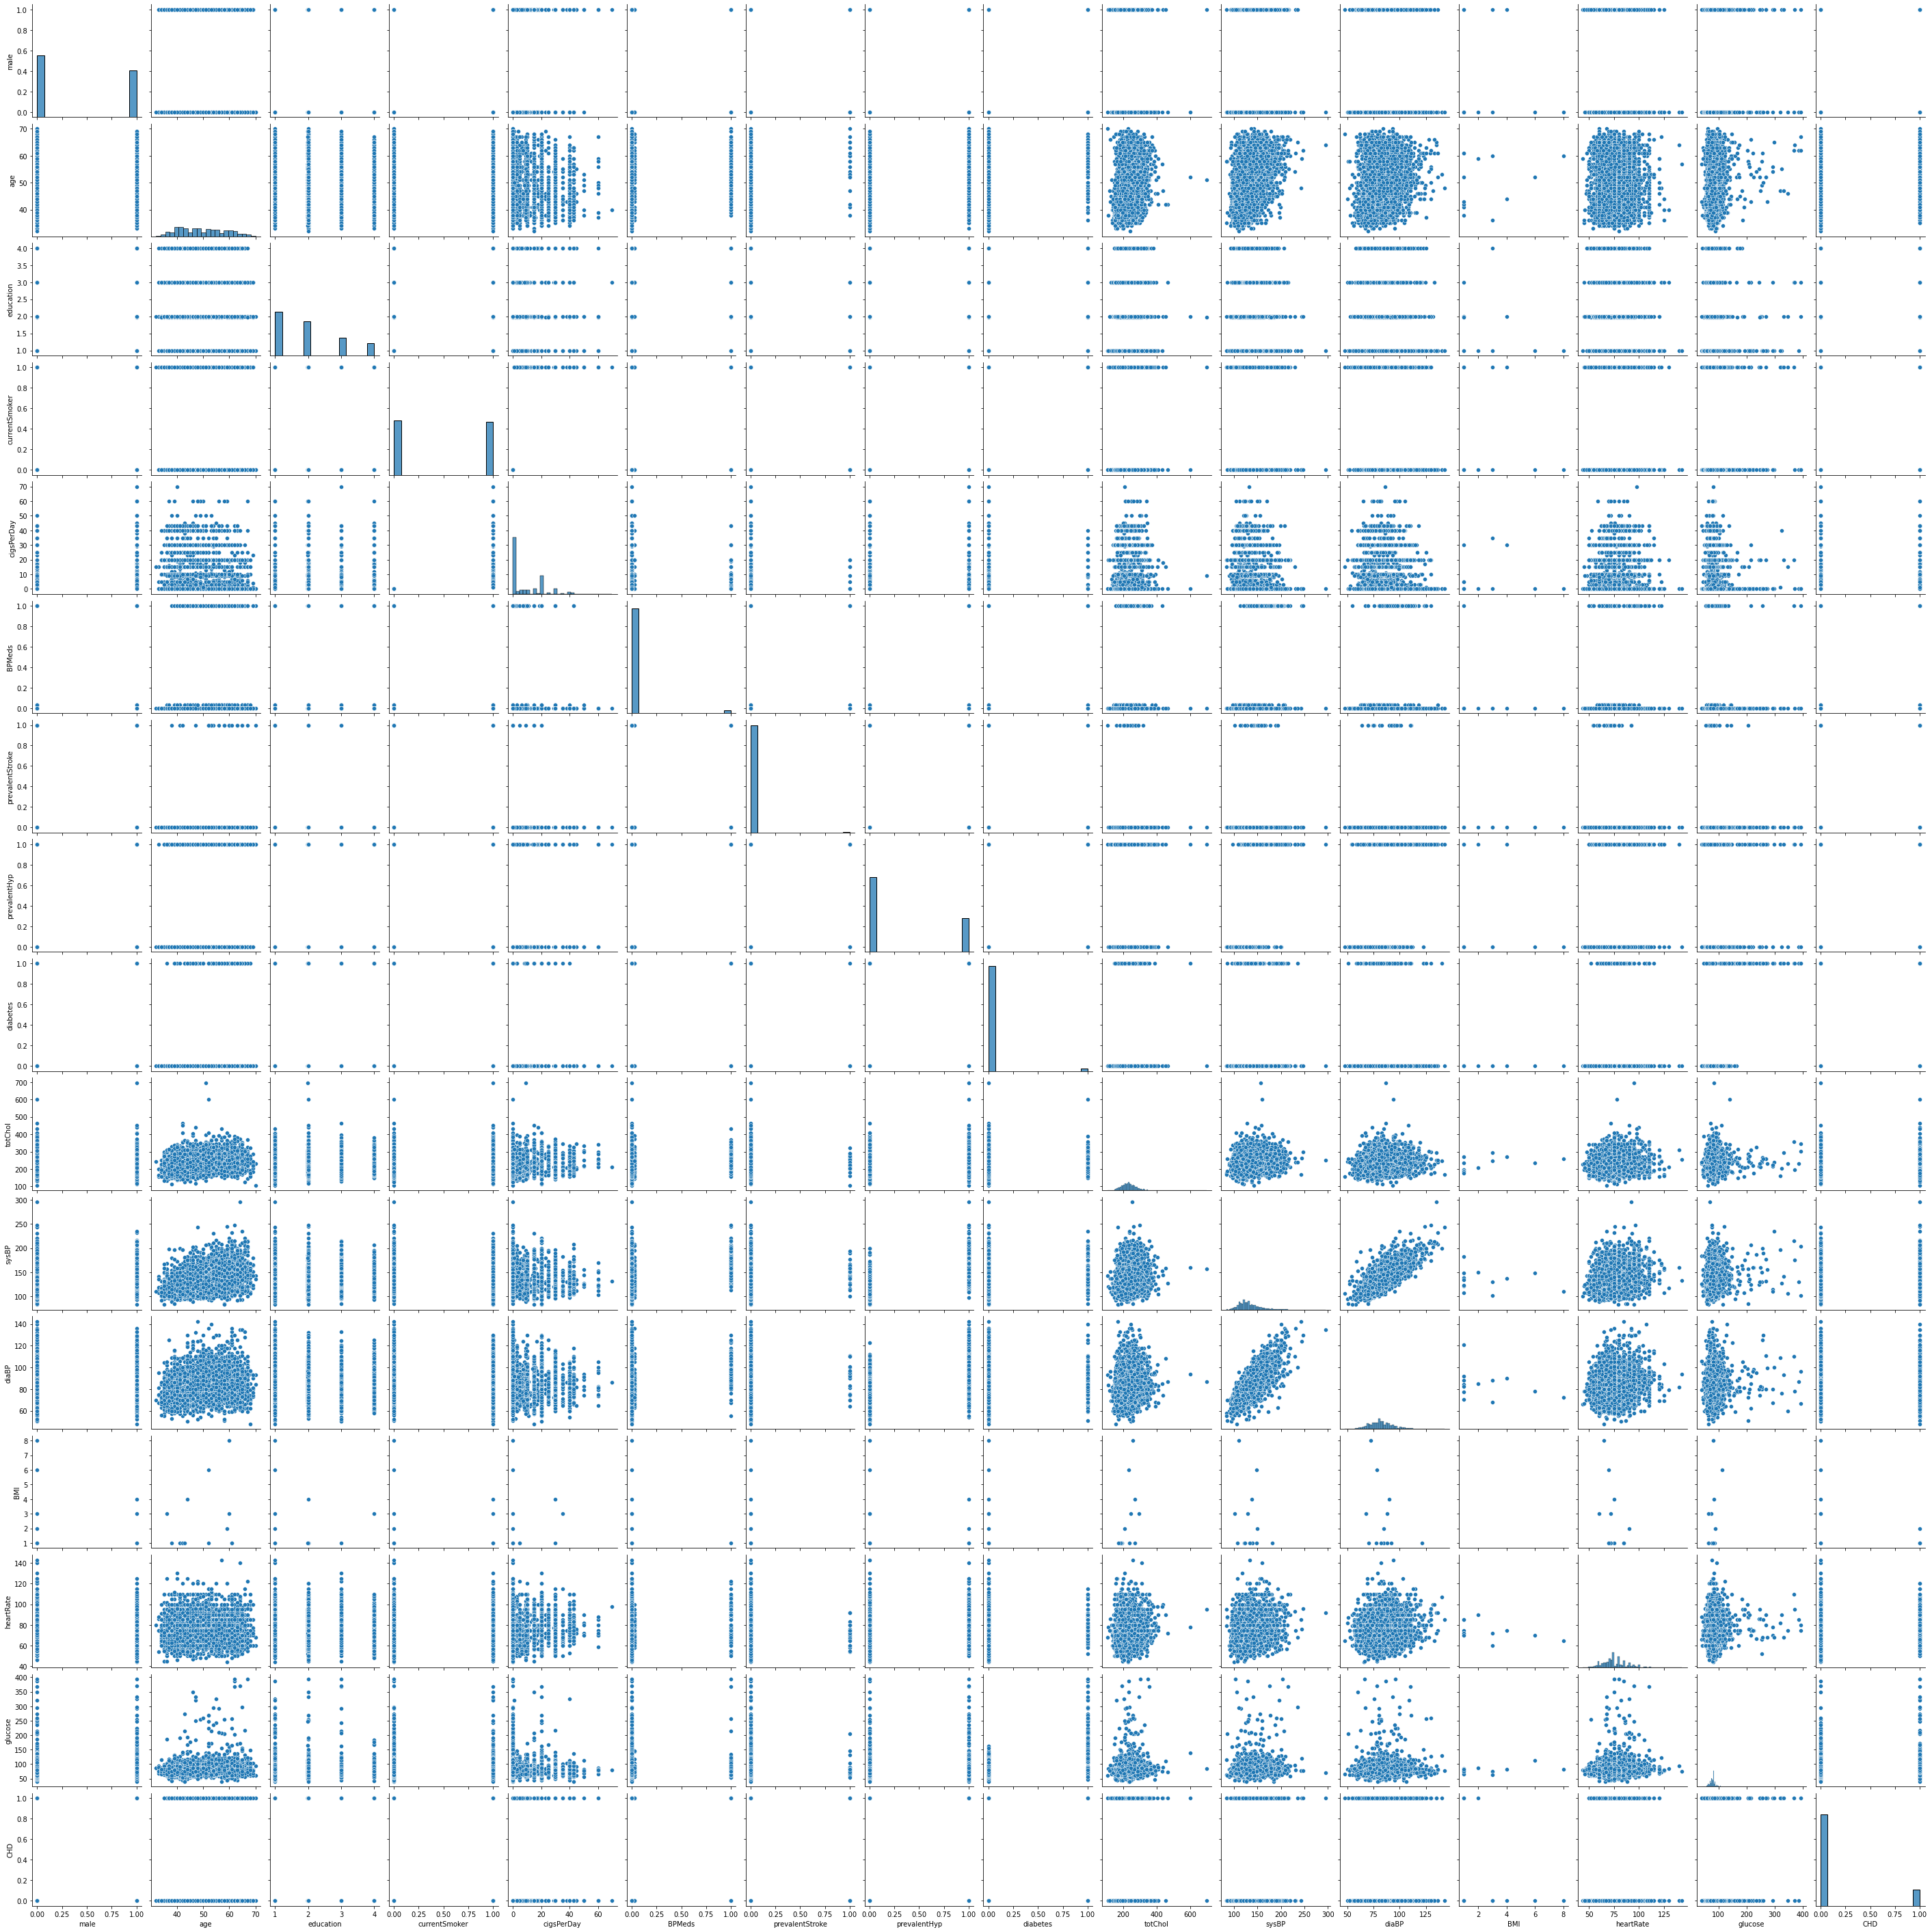

In [ ]:
sns.pairplot(data=df_fhd)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
1111,0,52,2.000000,0,0.0,0.0,0,1,1,600.0,159.5,94.0,NaN,78.0,140.0,1
3160,1,51,1.979444,1,9.0,0.0,0,1,0,696.0,157.0,87.0,NaN,95.0,84.0,0


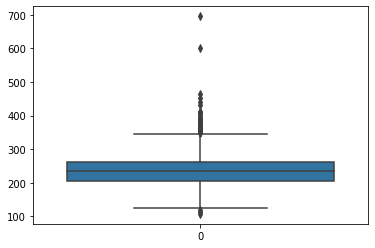

In [ ]:
sns.boxplot(df_fhd.totChol)
outliers = df_fhd[(df_fhd['totChol'] > 500)]
outliers

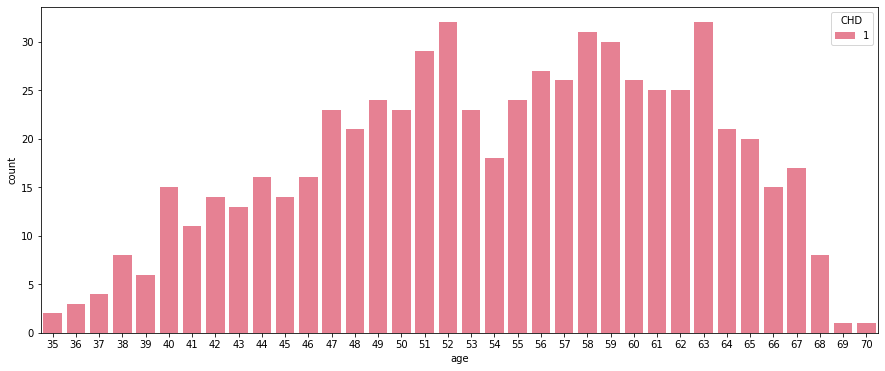

In [ ]:
## Number of people who have disease vs age
positive_cases = df_fhd[df_fhd['CHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'CHD', palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63

The number of sick people generally increases with age

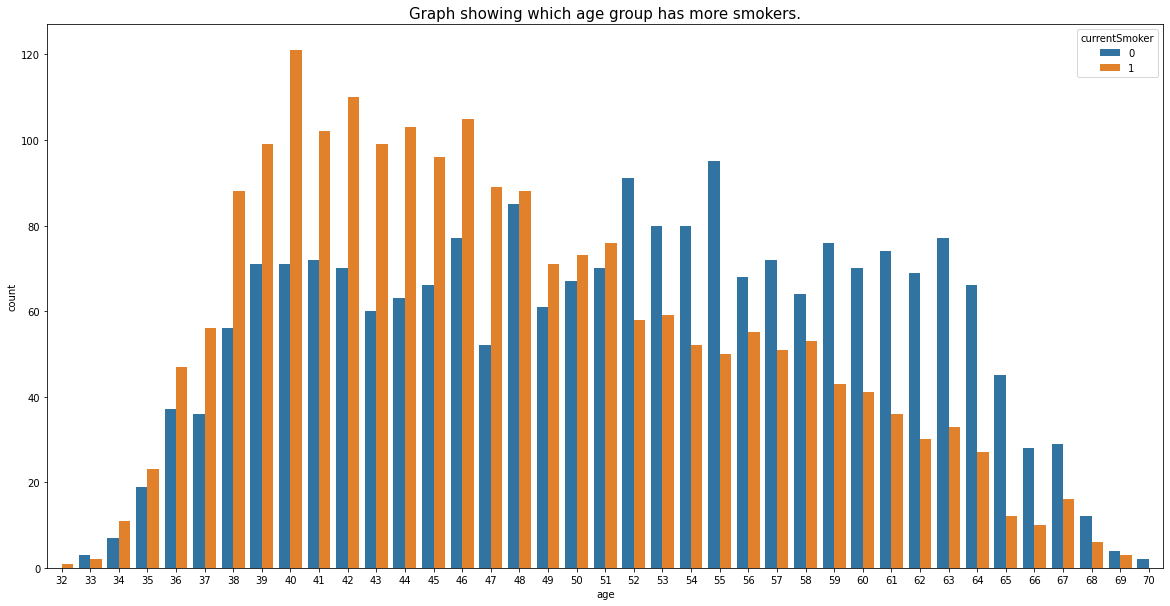

In [ ]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(20,10), facecolor='w')
sns.countplot(x="age",data=df_fhd,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=15)
plt.show()

Mid-age groups ranging from the age of 38 - 46 have more number of
currentSmokers.

No currentSmokers observed below the age of 32.

maximum age for a currentSmokers is 70.

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from statsmodels.tools import add_constant as add_constant
df_fhd_constant = add_constant(df_fhd)
df_fhd_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
categorical_features = ['age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for feature in categorical_features:
    print(feature,':')
    print(df_fhd[feature].value_counts())
    print("-----------------")

age :
40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64
-----------------
currentSmoker :
0    2145
1    2095
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.000000    4063
1.000000     124
0.029615      53
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    4215
1      25
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2923
1    1317
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    4131
1     109
Name: diabetes, dtype: int64
-----------------


In [ ]:
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
#Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(scaler.fit_transform(df_fhd), columns=df_fhd.columns)
df_scaled.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,0.462637,0.326481,0.494104,0.128656,0.029615,0.005896,0.310613,0.025708,0.220203,0.230991,0.369288,0.248686,0.322010,0.118541,0.151887
std,0.495027,0.225604,0.335694,0.500024,0.169737,0.168481,0.076569,0.462799,0.158280,0.075259,0.104176,0.126036,0.098659,0.121454,0.064496,0.358953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168081,0.158392,0.285714,0.182683,0.242424,0.090395,0.000000
50%,0.000000,0.447368,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215620,0.210402,0.359788,0.239215,0.313131,0.112994,0.000000
75%,1.000000,0.631579,0.666667,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.263158,0.286052,0.444444,0.302775,0.393939,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = df_fhd.iloc[:,0:15]
y = df_fhd.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(11,'Score'))

              Specs       Score
10            sysBP  727.935535
14          glucose  391.151105
1               age  319.266019
9           totChol  235.502392
4        cigsPerDay  220.812679
11            diaBP  152.748563
7      prevalentHyp   92.048736
8          diabetes   39.144944
5            BPMeds   30.615014
0              male   18.899930
6   prevalentStroke   16.109887


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.935535
14,glucose,391.151105
1,age,319.266019
9,totChol,235.502392
4,cigsPerDay,220.812679
11,diaBP,152.748563
7,prevalentHyp,92.048736
8,diabetes,39.144944
5,BPMeds,30.615014
0,male,18.899930


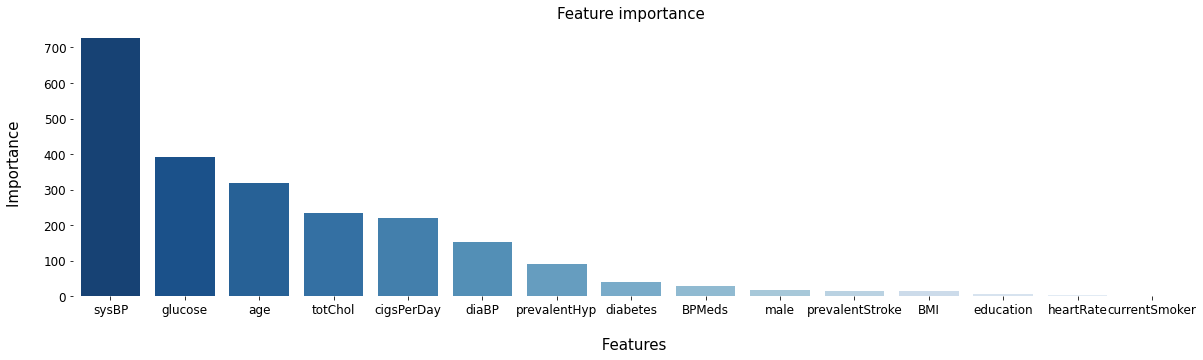

In [ ]:
#Visualization of Feature Selection:

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "Blues_r")
plt.box(False)
plt.title('Feature importance', fontsize=15)
plt.xlabel('\n Features', fontsize=15)
plt.ylabel('Importance \n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Education is not relevant for our prediction
#df_fhd.drop(['education'],axis=1,inplace=True)

In [ ]:
# Let select 10 best features that can be used to predict the output variable:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

**Training And Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
y = df_fhd['CHD']
X = df_fhd.drop(['CHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
print ('Train set:', train_x.shape,  train_y.shape)
print ('Test set:', test_x.shape,  test_y.shape)

Train set: (2544, 15) (2544,)
Test set: (1696, 15) (1696,)


# Logistic Regression

In [ ]:
#evaluation and accuracy
m1 = 'Logistic Regression'
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

from sklearn.metrics import jaccard_score
print('Accuracy of the model in jaccard similarity score is = ',
      jaccard_score(test_y, pred_y))

Accuracy of the model in jaccard similarity score is =  0.0546875


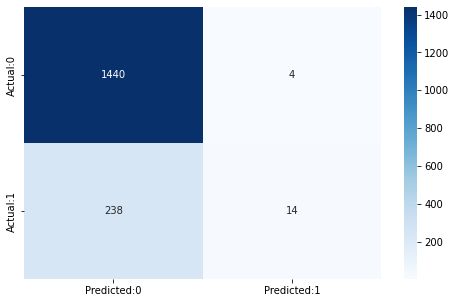

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1444
           1       0.78      0.06      0.10       252

    accuracy                           0.86      1696
   macro avg       0.82      0.53      0.51      1696
weighted avg       0.85      0.86      0.80      1696



In [ ]:
#confusion matrix

cm = confusion_matrix(test_y, pred_y)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.show()

print('The details for confusion matrix is =')
print (classification_report(test_y, pred_y))